In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score



In [3]:
# Loading and preprocessing Data

In [4]:
# Loading data
file_path = Path("../apestogetherstrong/logistic_regression_test.csv")
df_equities = pd.read_csv(file_path)
df_equities.head()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
0,0,A,Medical Specialties,Health Technology,8/20/2020,318382,1651518,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
1,1,AA,Aluminum,Non-Energy Minerals,8/20/2020,1543881,5460701,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
2,2,AAAU,Investment Trusts/Mutual Funds,Miscellaneous,8/20/2020,151621,584100,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
3,3,AACG,Miscellaneous Commercial Services,Commercial Services,8/20/2020,10963,36708,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
4,4,AADR,Investment Trusts/Mutual Funds,Miscellaneous,8/20/2020,177,1191,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [5]:
df_equities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 44 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   symbol                                        623468 non-null  object 
 2   industry                                      623468 non-null  object 
 3   sector                                        623468 non-null  object 
 4   date                                          623468 non-null  object 
 5   volume                                        623468 non-null  int64  
 6   volume_previousday                            623468 non-null  int64  
 7   volume_greater_previousday                    623468 non-null  int64  
 8   volume_deathIncrease_up                       623468 non-null  int64  
 9   volume_hospitalizedIncrease_up                62

In [6]:
rf_df = pd.DataFrame().assign(symbol=df_equities['symbol'],date=df_equities['date'],high=df_equities['high'],iexClose=df_equities['iexClose'],deathIncrease=df_equities['deathIncrease'],negativeIncrease=df_equities['negativeIncrease'],positiveIncrease=df_equities['positiveIncrease'],totalTestResultsIncrease=df_equities['totalTestResultsIncrease'],iexClose_hospitalizedIncrease_up=df_equities['iexClose_hospitalizedIncrease_up'], sector=df_equities['sector'])
print(rf_df)
rf_df.info()

       symbol        date    high  iexClose  deathIncrease  negativeIncrease  \
0           A   8/20/2020  98.150    98.065           1129            208472   
1          AA   8/20/2020  15.120    14.965           1129            208472   
2        AAAU   8/20/2020  19.440    19.400           1129            208472   
3        AACG   8/20/2020   1.126     1.190           1129            208472   
4        AADR   8/20/2020  56.330    58.260           1129            208472   
...       ...         ...     ...       ...            ...               ...   
623463    ZVO  12/23/2020   4.270     4.130           3393            304962   
623464   ZYME  12/23/2020  53.700    51.030           3393            304962   
623465   ZYNE  12/23/2020   3.505     3.415           3393            304962   
623466   ZYXI  12/23/2020  14.490    13.820           3393            304962   
623467   TRUE  12/23/2020   4.610     4.505           3393            304962   

        positiveIncrease  totalTestResu

In [7]:
float or np.ndarray(dtype=float)
rf_df['date'] = pd.to_datetime(rf_df['date'])    
rf_df['date_delta'] = (rf_df['date'] - rf_df['date'].min())  / np.timedelta64(1,'D')
# converting to object
rf_df = rf_df.astype({"date":'int64'}) 

In [8]:
# Generate our categorical variable lists
rf_cat = ['sector']

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(rf_df[rf_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(rf_cat)
encode_df.head()

# Merge one-hot encoded features and drop the originals
rf_df = rf_df.merge(encode_df,left_index=True, right_index=True)
rf_df = rf_df.drop(rf_cat,1)
rf_df.head()

,symbol,date,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,iexClose_hospitalizedIncrease_up,date_delta,...,sector_Producer Manufacturing,"sector_Professional, Scientific, and Technical Services",sector_Public Administration,sector_Real Estate and Rental and Leasing,sector_Retail Trade,sector_Technology Services,sector_Transportation,sector_Transportation and Warehousing,sector_Utilities,sector_Wholesale Trade
0,A,1597881600000000000,98.150,98.065,1129,208472,43844,864210,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AA,1597881600000000000,15.120,14.965,1129,208472,43844,864210,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAU,1597881600000000000,19.440,19.400,1129,208472,43844,864210,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AACG,1597881600000000000,1.126,1.190,1129,208472,43844,864210,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AADR,1597881600000000000,56.330,58.260,1129,208472,43844,864210,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
rf_df = rf_df.drop(labels=["symbol", "date"], axis=1)
rf_df.head()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,iexClose_hospitalizedIncrease_up,date_delta,sector_0,sector_Accommodation and Food Services,...,sector_Producer Manufacturing,"sector_Professional, Scientific, and Technical Services",sector_Public Administration,sector_Real Estate and Rental and Leasing,sector_Retail Trade,sector_Technology Services,sector_Transportation,sector_Transportation and Warehousing,sector_Utilities,sector_Wholesale Trade
0,98.150,98.065,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.120,14.965,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.440,19.400,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.126,1.190,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.330,58.260,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
rf_df = rf_df.drop(labels=["sector_0"], axis=1)
rf_df.head()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,iexClose_hospitalizedIncrease_up,date_delta,sector_Accommodation and Food Services,sector_Administrative and Support and Waste Management and Remediation Services,...,sector_Producer Manufacturing,"sector_Professional, Scientific, and Technical Services",sector_Public Administration,sector_Real Estate and Rental and Leasing,sector_Retail Trade,sector_Technology Services,sector_Transportation,sector_Transportation and Warehousing,sector_Utilities,sector_Wholesale Trade
0,98.150,98.065,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.120,14.965,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.440,19.400,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.126,1.190,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.330,58.260,1129,208472,43844,864210,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#dummy = pd.get_dummies(rf_df['sector'])
#dummy.head()

In [12]:
#rf_df = rf_df.drop('sector', axis=1)
#rf_df1 = pd.concat([dummy, rf_df],)

In [13]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 46 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   high                                                                             623468 non-null  float64
 1   iexClose                                                                         623468 non-null  float64
 2   deathIncrease                                                                    623468 non-null  int64  
 3   negativeIncrease                                                                 623468 non-null  int64  
 4   positiveIncrease                                                                 623468 non-null  int64  
 5   totalTestResultsIncrease                                                         623468 non-null  int64  
 

In [15]:
# Create our features
#X = pd.get_dummies(df_equities, columns=["death", "deathIncrease", "hospitalizedIncrease", "hospitalizedCurrently", "negative", "positive", "totalTestResults", "totalTestResultsIncrease"])
X = rf_df.drop('iexClose_hospitalizedIncrease_up',axis=1)
# Create our target
y = pd.DataFrame(rf_df["iexClose_hospitalizedIncrease_up"])
X.head()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_delta,sector_Accommodation and Food Services,sector_Administrative and Support and Waste Management and Remediation Services,"sector_Agriculture, Forestry, Fishing and Hunting",...,sector_Producer Manufacturing,"sector_Professional, Scientific, and Technical Services",sector_Public Administration,sector_Real Estate and Rental and Leasing,sector_Retail Trade,sector_Technology Services,sector_Transportation,sector_Transportation and Warehousing,sector_Utilities,sector_Wholesale Trade
0,98.150,98.065,1129,208472,43844,864210,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.120,14.965,1129,208472,43844,864210,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.440,19.400,1129,208472,43844,864210,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.126,1.190,1129,208472,43844,864210,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.330,58.260,1129,208472,43844,864210,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 45 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   high                                                                             623468 non-null  float64
 1   iexClose                                                                         623468 non-null  float64
 2   deathIncrease                                                                    623468 non-null  int64  
 3   negativeIncrease                                                                 623468 non-null  int64  
 4   positiveIncrease                                                                 623468 non-null  int64  
 5   totalTestResultsIncrease                                                         623468 non-null  int64  
 

In [17]:
X.describe()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_delta,sector_Accommodation and Food Services,sector_Administrative and Support and Waste Management and Remediation Services,"sector_Agriculture, Forestry, Fishing and Hunting",...,sector_Producer Manufacturing,"sector_Professional, Scientific, and Technical Services",sector_Public Administration,sector_Real Estate and Rental and Leasing,sector_Retail Trade,sector_Technology Services,sector_Transportation,sector_Transportation and Warehousing,sector_Utilities,sector_Wholesale Trade
count,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,6.234680e+05,623468.000000,623468.000000,623468.000000,623468.000000,...,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000
mean,41.163351,42.778524,1273.873418,250270.392405,100151.316456,1.282244e+06,62.164557,0.001315,0.001756,0.000409,...,0.026325,0.004892,0.000024,0.003105,0.019173,0.044342,0.012523,0.004565,0.016538,0.001780
std,103.949506,104.890778,806.655191,124994.255672,68173.329913,4.011269e+05,35.269849,0.036242,0.041872,0.020220,...,0.160101,0.069772,0.004905,0.055638,0.137134,0.205855,0.111206,0.067409,0.127533,0.042157
min,0.000000,0.007000,246.000000,-658774.000000,22310.000000,5.468590e+05,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.580000,9.180000,847.000000,211097.000000,43642.000000,9.504830e+05,33.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.680000,22.920000,1047.000000,263255.000000,63430.000000,1.182695e+06,61.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.739250,44.160000,1358.000000,304962.000000,166503.000000,1.653269e+06,91.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4530.000000,4474.000000,3453.000000,456078.000000,236933.000000,2.010951e+06,125.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Check the balance of our target values
y["iexClose_hospitalizedIncrease_up"].value_counts()

0    502691
1    120777
Name: iexClose_hospitalizedIncrease_up, dtype: int64

In [19]:
y.tail()

,iexClose_hospitalizedIncrease_up
623463,1
623464,0
623465,0
623466,0
623467,1


In [20]:
# Check the balance of our target values
y['iexClose_hospitalizedIncrease_up'].value_counts(normalize=True)

0    0.806282
1    0.193718
Name: iexClose_hospitalizedIncrease_up, dtype: float64

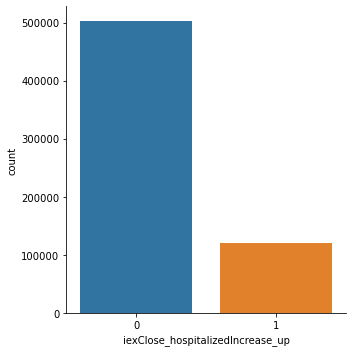

In [21]:
import seaborn as sn
sn.factorplot('iexClose_hospitalizedIncrease_up', data=y,kind='count')

In [22]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
# Create a random forest classifier.
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit
brf_model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [24]:
# Making predictions using the testing data.
predictions = brf_model.predict(X_test)

In [25]:
predictions

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [26]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.8123818046475606

In [27]:
# Display the confusion matrix
confusion_matrix(y_test, predictions)

array([[93056, 32755],
       [ 3453, 26603]], dtype=int64)

In [29]:
# Calculate feature importance in the Random Forest model.
importances = brf_model.feature_importances_
importances

array([2.15512508e-01, 2.43410451e-01, 1.31786719e-01, 9.41408045e-02,
       8.12617872e-02, 1.12982558e-01, 7.75740227e-02, 2.94060378e-04,
       3.24130216e-04, 1.32021820e-04, 2.20704223e-04, 1.12208209e-03,
       6.39598418e-04, 3.13771301e-04, 1.04052092e-03, 1.06869814e-03,
       1.37139162e-03, 7.51076143e-04, 2.48831285e-04, 1.28410187e-03,
       1.25972488e-03, 3.13103699e-03, 1.68056321e-03, 3.24841973e-04,
       8.75322292e-04, 2.26076916e-03, 1.09767072e-03, 8.35448907e-04,
       9.38778386e-05, 2.34706040e-03, 5.81064519e-04, 8.64534590e-03,
       1.14071773e-03, 1.05308898e-04, 1.10956768e-03, 1.28040348e-03,
       5.54040946e-04, 9.21750412e-06, 4.33642417e-04, 1.45263678e-03,
       1.80232248e-03, 9.72362503e-04, 5.27601987e-04, 1.62657715e-03,
       3.73035178e-04])

In [32]:
# We can sort the features by their importance.
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.24341045118870816, 'iexClose'),
 (0.21551250836121885, 'high'),
 (0.13178671852192536, 'deathIncrease'),
 (0.11298255758513656, 'totalTestResultsIncrease'),
 (0.09414080446531176, 'negativeIncrease'),
 (0.08126178719367738, 'positiveIncrease'),
 (0.07757402274878974, 'date_delta'),
 (0.008645345897739439, 'sector_Miscellaneous'),
 (0.0031310369864317815, 'sector_Finance'),
 (0.0023470604011546375, 'sector_Manufacturing'),
 (0.002260769162391864, 'sector_Health Technology'),
 (0.0018023224804483678, 'sector_Technology Services'),
 (0.0016805632137468663, 'sector_Finance and Insurance'),
 (0.0016265771450371458, 'sector_Utilities'),
 (0.001452636780312909, 'sector_Retail Trade'),
 (0.0013713916200511886, 'sector_Consumer Services'),
 (0.0012841018718360883, 'sector_Electronic Technology'),
 (0.0012804034754319593, 'sector_Producer Manufacturing'),
 (0.0012597248765806657, 'sector_Energy Minerals'),
 (0.0011407177261449825, 'sector_Non-Energy Minerals'),
 (0.0011220820928804465, 'sect

In [31]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.74      0.89      0.84      0.81      0.65    125811
          1       0.45      0.89      0.74      0.60      0.81      0.66     30056

avg / total       0.86      0.77      0.86      0.79      0.81      0.65    155867

